# 머신러닝, 데이터에서 규칙을 찾고, 학습하고, 결과를 예측하는 분석 방법
## 인공지능의 한 분야
## 2가지 학습 방법
### 1) 지도 학습(답지 있음) ex) 통계자료가 있다. 의료기관수, 암 진단 등 =>  타겟,라벨이 있다. -> 정확도가 높다
### 2) 비지도 학습 -> 데이터 수집 -> 정확도 낮음

### 해결하는 주요 문제 1)회귀 2)분류 3) 군집
### 사이킷런의 모듈을 이용해서, 위의 머신러닝 테스트를 진행할 예정
### 논문, 트위터, 유튜브, 깃허브 등을 이용해서 관련 자료를 많이 수집. GPT도 많이 사용

### 레스트 서버를 구축시, 파이썬에 과학에 관련된 라이브러리가 많다 보니,
### 파이썬 관련 서비스를 제공하는 REST API를 따로 만들기도 함
### Django 장고(파이썬 기반의 웹 프레임워크), flask, FAST API, 전부 다 파이썬 기반

### 앞단 (기본적인 웹, 리액트, 안드로이드 앱)
### 뒷단 (스프링, 노트JS, 장고, 플라스크, FAST API, 파이어베이스 등 ,네이버, 카카오, 구글 API들...)




### 답이 있는 데이터, 지도 학습
## 주택 가격 예측

## 자동차 연비 예측

## 샘플 데이터는, 사이킷런에 내장된 데이터, 보스톤 집값을 사용하면 됩니다.
### 버전이 변경 되어서, 데이터를 받으려면, 버전 맞춰주는 작업이 필요.

### 일반 프로그램 진행 방식, 머신러닝 진행 방식
### 일반 프로그램 진행 방식
### 입력값(X) ->일반 프로그램(예)함수) -> 결괏값(Y)
### 새로운 입력값(X) -> 일반 프로그램(예)함수) -> 새로운 결괎값(Y)

### 머신러닝 진행 방식
### 입력값(X) -> ML프로그램 (예)함수) -> 학습 모델 -> 결괏값(Y)
### 새로운 입력값(x) -> 학습모델 -> 새로운 출력값(y) = 예측값

### 머신러닝 프로세스
### 1) 데이터 수집
### 2)데이터 전처리 및 학습/ 테스트분할 ->100문제 중 70:학습, 30:평가
### 3)모델 구축 및 학습 
### 4) 모델 평가 
### 5) 예측

### 분석 평가 지표
### 오류 부분의 지표가 낮을수록 좋다.
### MAE : Mean Absolute Error : 오류의 절댓값 평균
### MSE : Mean Squared Error : 오류의 제곱 평균
### RMSE : Root Mean Squared Error : ㅇ류의 제곱 평균의 제곱근 ex) 4, 4의 제곱근:2

### 값이 클수록, 실제값에 가깝다.
### R^2 : Variance Score : 결정계수, 예측값의 분산/ 실제값의 분산으로 나눈 비율


In [27]:
# 기존에는 ->
# !pip install sklearn
!pip install scikit-learn==1.0.2

In [28]:
import numpy as numpy
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [29]:
# 사이킷런 내부 데이터 -> 메모리 -> dataFrame담기
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
# 보스턴 집값 예측, 여기서 종속변수(=타겟, =라벨) PRICE가격이 따로 속성으로 있음.
# 현재, 데이터 프레임 표에서, 새 컬럼으로 추가하기 PRICE
boston_df["PRICE"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
#보스턴 집값 관련 데이터 몇개인지?
print(f"보스턴 집값의 {boston_df.shape}")


보스턴 집값의 (506, 14)


In [32]:
#기본 정보 조회 : info()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [33]:
#각 컬럼의 정보 (14개)
## CRIM : 지역별 범죄 발생률
### ZN : 25,000 평방비트를 초과하는 거주 비율
### INDUS : 비상업 지역의 넓이의 비율
### CHAS : 찰스강의 더비 변수 (1은 강의 경계, 0은 경계아님)
### NOX : 일산화질소 농도
### RM : 거주할 수 있는 방 갯수
### AGE : 1940 년도 이전에 건축된 주택 비율
### DIS : 5개 주요 고용센터까지 가중 거리
### RAD : 고속도로 접근 용이도
### TAX : 10,000 달러당 재산세 비율
### PTRATIO : 지역의 교사와 학생 비율
### B : 지역의 흑인 거주 비율
### LSTAT : 하위 계층 비율
### PRICE : 본인 소유 주택 가격의 중앙값

In [34]:
#선형(직성) 회귀분석을 이용해서, 분석 보델 구축
from sklearn.linear_model import LinearRegression
#학습용, 평가용 분리
from sklearn.model_selection import train_test_split
# 분석 평가지수, MSE(오류의 제곱 평균 : 낮을수록 좋다. 모델의 예측값이, 실제 값과 거의 유사)
# R^2 : 예측값/실제값 비율. 클수록 좋다.모델의 예측값이, 실제 값과 거의 유사
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# X,Y 분할, 독립변수, 종속변수를 나누는 작업.
Y = boston_df["PRICE"]
# PRICE를 제외한 나머지 변수 가지고 오기.
# axis=1 -> 열 기준
# inplace=False -> 원본에 영향x
X = boston_df.drop(["PRICE"], axis=1, inplace=False)

In [36]:
#훈련용, 테스트용으로 데이터를 분리하는 작업
#(X,Y,test_size=0.3) -> 독립변수, 종속변수, 평가데이터 비율(30:평가, 70:학습)
#random_state=156 -> 동일한 방식으로 데이터 분할.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=156)

In [37]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, X_train : {Y_train.shape}, X_train : {Y_test.shape}")

X_train : (354, 13), X_test : (152, 13), X_train : (354,), X_train : (152,)


In [38]:
#선형 회귀 분석 이용해서, 모델 생성
lr = LinearRegression()

In [39]:
#모델을 이용해서 훈련(학습)하기 ->fit
lr.fit(X_train,Y_train)

LinearRegression()

In [40]:
#학습된 모델을 이용해서 평가하기 -> predict, 예측값을 이용해서, 실제값과 비교하기
# 30문제로 평가하기. 예측값 구하기
y_predict = lr.predict(X_test)

In [42]:
# 평가 분석 지표
# MSE : 오류의 제곱 평균
# R^2 Score : 예측값/실제값 나눈 비율
# Y_test:답지, y_predict:시험 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2 값을 통일 시켰다. 나중에 스케일링을 많이 함. 정규화 등으로 고쳐야 통계시
#효율적으로 작업이 진행되므로 이런 작업 많이 함
import numpy as np
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse}, r2_value : {r2_value}")

mse : 17.29691590790195, rmse : 4.158956107955691, r2_value : 0.757226332313895


In [43]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
#독립변수의 계수값
print(f"회귀 계수의 값 : {np.round(lr.coef_,1)}")

Y 절편의 값 : 40.995595172164435
회귀 계수의 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [45]:
# CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE 값 정리 
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [ ]:
# 직선 -> y = ax+b
# Y(price) = -0.11 x X(crim) + 0.03 x X(INDUS) + ....
# 계수들은 모델의 성능을 최적화할 때 사용되는 하이퍼 매개변수, 웨이트 값(비중값)
# 비중값들이 여러 환경적인 요인에 의해서 조정됨.
# 예를들어, 딥러닝 -> 다층 신경망 사이사이에 손실함수, 활성화 함수, 정규화 등 이용해서
# 최적의 비중값을 찾아가는 과정 -> 모델의 성능을 최적화하는 과정

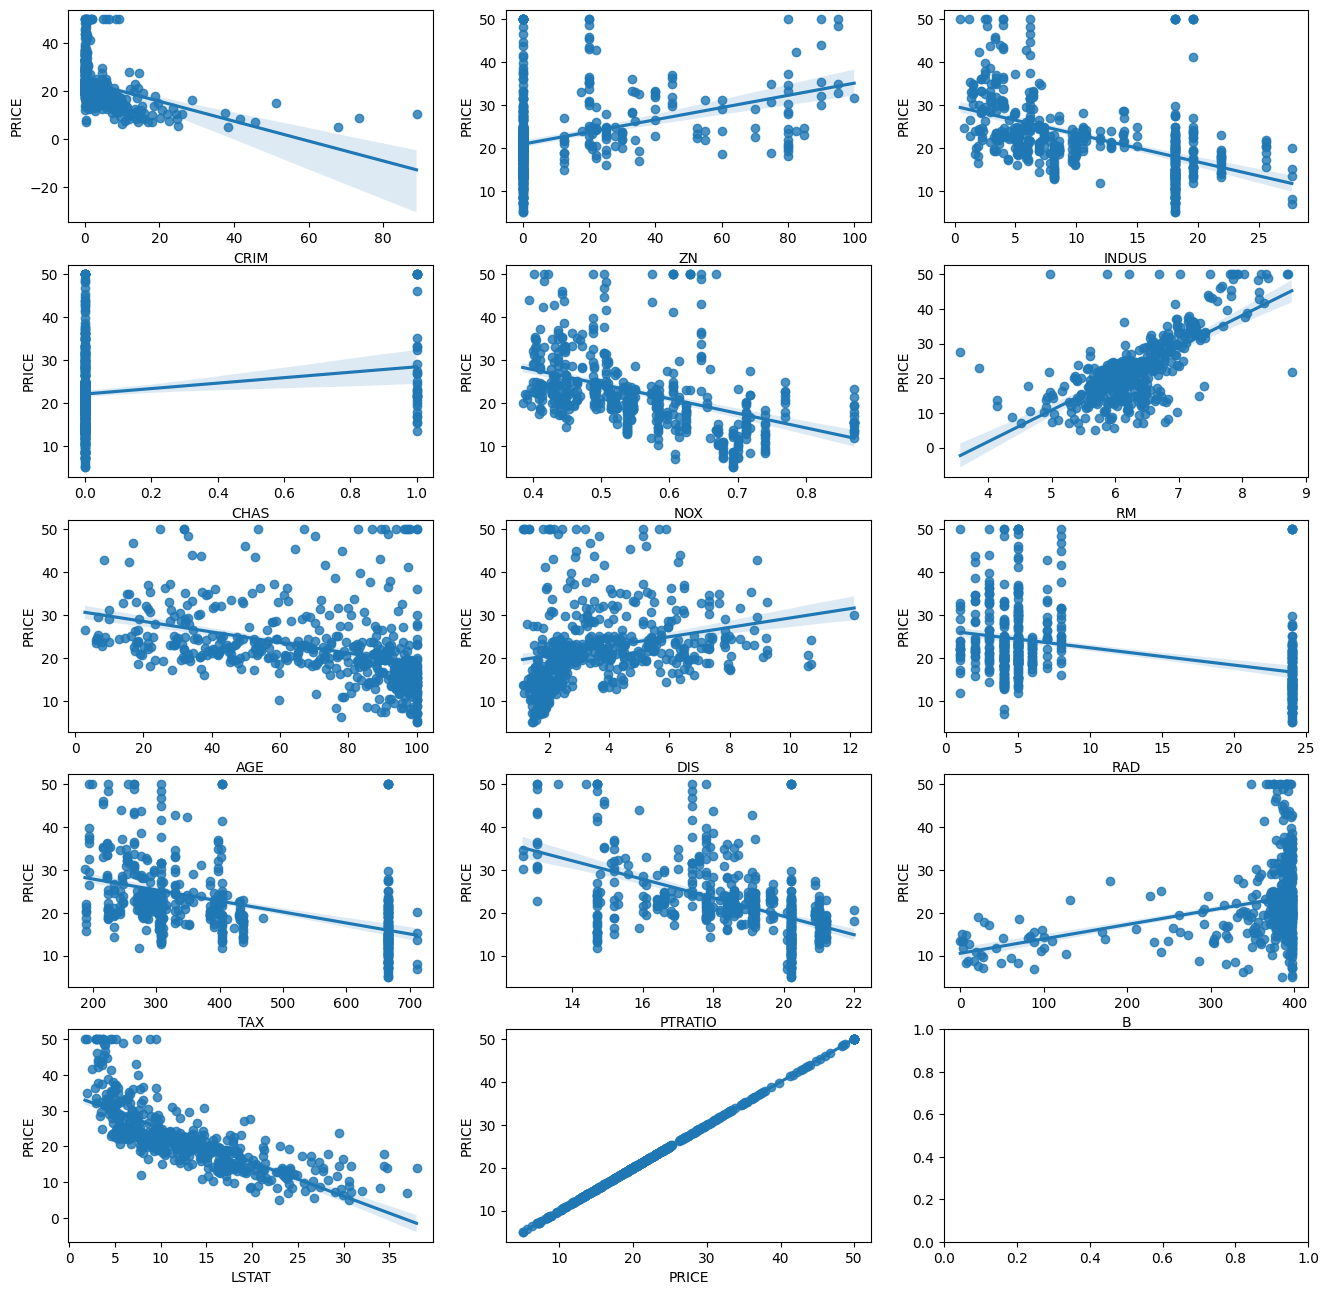

In [49]:
#학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도 하고 MSE R^2, 평가 지표
#학습된 모델의 예측값, 실제값과 얼마나 일치하는지를 조사.
#시각화

import matplotlib.pyplot as plt
import seaborn as sns

#이미지들을, 5x3 표 형태로 나타내기
fig, axs = plt.subplots(figsize = (16,16),ncols = 3, nrows = 5)

x_features = ["CRIM","ZN","INDUS","CHAS",	"NOX",	"RM"	,"AGE"	,"DIS"	,"RAD",	"TAX",	"PTRATIO"	,"B"	,"LSTAT",	"PRICE"]

for i,feature in enumerate(x_features):
  #몫 -> 5개 행으로
  row = int(i/3)
  #나머지 -> 0,1,2반복
  col = i % 3
  sns.regplot(x=feature, y="PRICE",data=boston_df, ax = axs[row][col])
